# LINEAR REGRESSION

## PART 1: INTRODUCTION

- **Classification problem:** supervised learning problem with a categorical response
- **Regression problem**: supervised learning problem with a continuous response
- **Linear regression:** machine learning model that can be used for regression problems

__WHY ARE WE LEARNING LINEAR REGRESSION?__
- widely used
- runs fast
- easy to use (no tuning is required)
- highly interpretable
- basis for many other methods

__LESSON GOALS__

- Conceptual understanding of linear regression and how it "works"
- Familiarity with key terminology
- Ability to apply linear regression to a machine learning problem using scikit-learn
- Ability to interpret model coefficients
- Familiarity with different approaches for feature selection
- Understanding of three different evaluation metrics for regression
- Understanding of linear regression's strengths and weaknesses

__LIBRARIES__

- [scikit-learn](http://scikit-learn.org/stable/): "machine learning in Python"
     - significant functionality for general purpose machine learning

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

__SETUP VISUALIZATION__

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## PART 2: READING THE ADVERTISING DATA 

In [0]:
# read data into a DataFrame
ads = pd.read_csv('https://raw.githubusercontent.com/ybaktir/teaching_for_good/master/Advertising.csv', index_col=0)
ads.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
ads.shape

(200, 4)

## What are the observations?
- Each observation represents **one market** (200 markets in the dataset)

## What are the features?
- **TV:** advertising dollars spent on TV for a single product (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

## What is the response?
- **Sales:** sales of a single product in a given market (in thousands of widgets)

## Questions about the data
You are asked by the company: On the basis of this data, how should we spend our advertising money in the future?
You come up with more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?



## PART 3: VISUALIZATION

### VISUALIZING THE DATA IN SEABORN
* Use a **scatter plot** to visualize the relationship between the features and the response.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


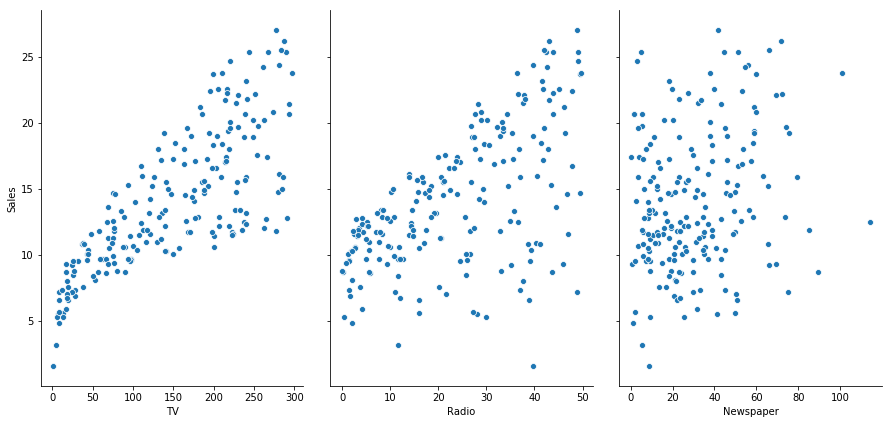

In [0]:
# scatter plot in Seaborn
sns.pairplot(ads, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7)

### Include a "regression line"

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


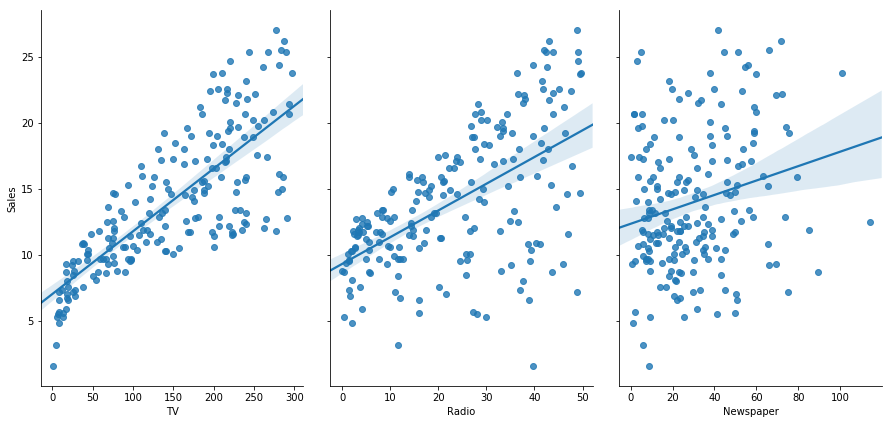

In [0]:
sns.pairplot(ads, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg')
#sns.pairplot(ads, x_vars=['Radio'], y_vars='Newspaper', size=6, aspect=0.7, kind='reg')

### USA A SCATTER MATRIX TO VISUALIZE THE RELATIONSHIP BETWEEN ALL NUMERICAL VARIABLES

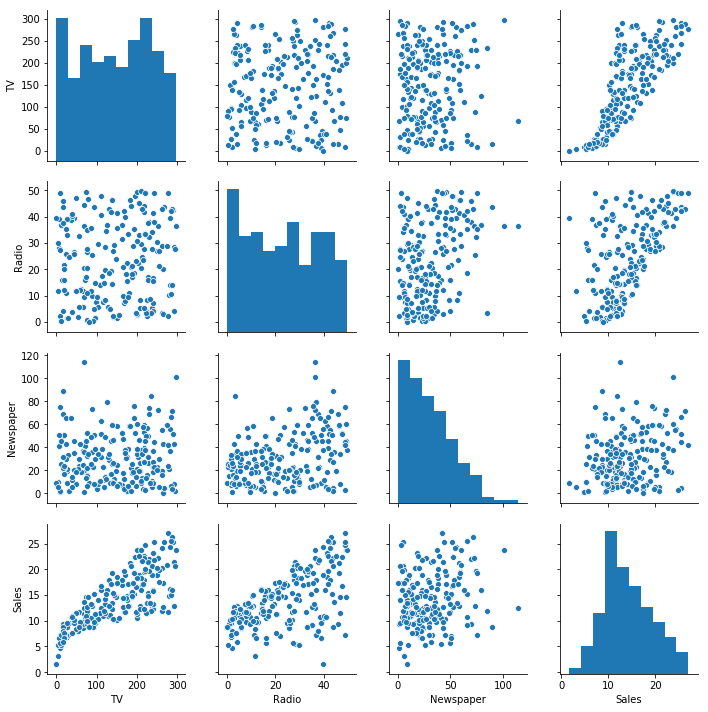

In [0]:
# scatter matrix in Seaborn
sns.pairplot(ads)

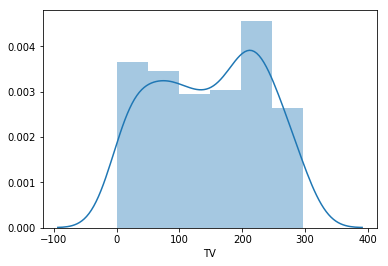

In [0]:
sns.distplot(ads.TV)

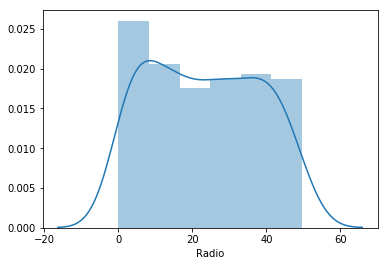

In [0]:
sns.distplot(ads.Radio)

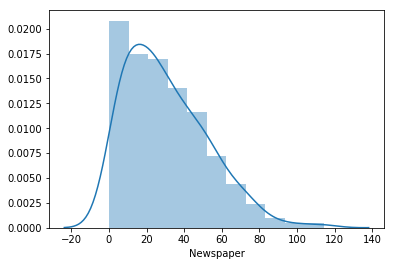

In [0]:
sns.distplot(ads.Newspaper)

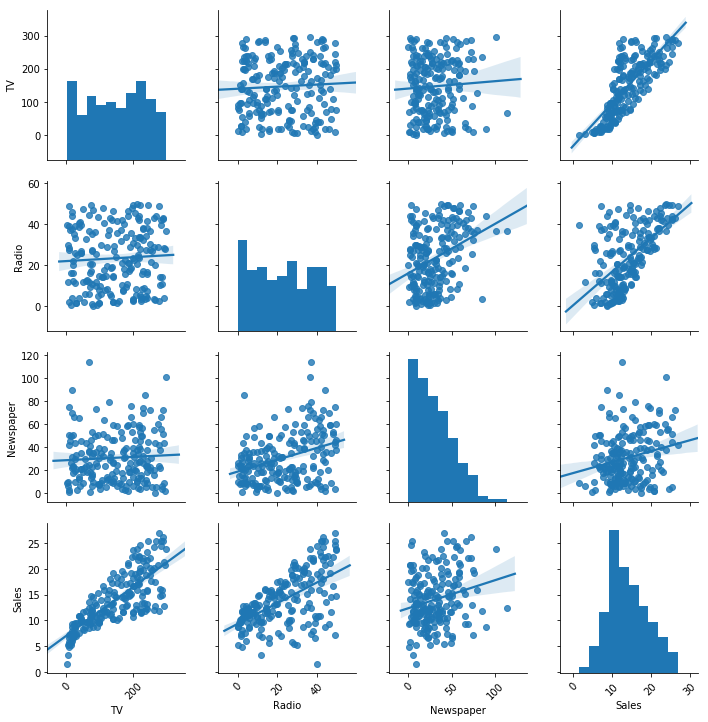

In [0]:
# scatter matrix in seaborn
g = sns.pairplot(ads[["TV", "Radio", "Newspaper", "Sales"]], diag_kind="hist", kind="reg")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

In [0]:
# compute correlation matrix
ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### DISPLAY CORRELATION MATRIX IN A SEABORN USING A HEATMAP

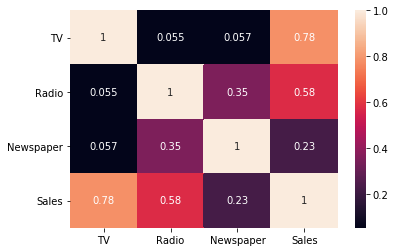

In [0]:
sns.heatmap(ads.corr(), annot=True)

## PART 3: SIMPLE LINEAR REGRESSION

[The Mathematics of Linear Regression](https://en.m.wikipedia.org/wiki/Linear_least_squares_(mathematics))

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:
 $y = \beta_0 + \beta_1x$
 - $y$ is the response
 - $x$ is the feature
 - $\beta_0$ is the intercept
 - $\beta_1$ is the coefficient for x

 $\beta_0$ and $\beta_1$ are called the **model coefficients**:

 - We must "learn" the values of these coefficients to create our model.
 - And once we've learned these coefficients, we can use the model to predict Sales.

### Estimating ("learning") model coefficients
 - Coefficients are estimated during the model fitting process using the **least squares criterion**.
 - We are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

### Estimating Coefficients diagram
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

![Estimating Coefficients](./images/estimating_coefficients.png)

### Slope Intercept diagram
![Slope Intercept](./images/slope_intercept.png)

### How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

### LET'S ESTIMATE THE MODEL COEFFICIENTS FOR THE ADVERTISING DATA USING SCIKIT-LEARN

In [0]:
# create X and y
feature_cols = ['TV']
X = ads[feature_cols]
y = ads.Sales

In [0]:
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

7.032593549127695
[0.04753664]


### INTERPRETING MODEL COEFFICIENTS

### How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0475 "unit" increase in Sales.
- Meaning: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 widgets.
- This is not a statement of **causation**.

### If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Using the model for prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?
$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times 50$$

### manually calculate the prediction
7.0326 + 0.0475*50

### PREDICT USING SCIKIT-LEARN

In [0]:
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
# predict for a new observation
linreg.predict([[50]])

array([9.40942557])

* Thus, we would predict Sales of **9,409 widgets** in that market.

### QUESTION: Does the scale of the features matter?
* Let's say that TV was measured in dollars, rather than thousands of dollars. How would that affect the model?

In [0]:
# create X and y
feature_cols = ['TV']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

7.032593549127695
[0.04753664]


###  How do we interpret the TV_dollars coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0000475 "unit" increase in Sales.
- Meaning: An additional dollar spent on TV ads is **associated with** an increase in sales of 0.0475 widgets.
- Meaning: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 widgets.

In [0]:
# predict for a new observation
linreg.predict([[50000]])

array([2383.8646152])

The scale of the features is **irrelevant** for linear regression models, since it will only affect the scale of the coefficients, and we simply change our interpretation of the coefficients.


## PART 4: A DEEPER UNDERSTANDING

### Bias and variance
#### Linear regression is a low variance/high bias model:
- **Low variance:** Under repeated sampling from the underlying population, the line will stay roughly in the same place
- **High bias:** The line will rarely fit the data well
(The model is usually underfit)

### How well does the model fit the data?

#### R-squared:
- A common way to evaluate the overall fit of a linear model
- Defined as the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model
- Also defined as the reduction in error over the **null model**, which is the model that simply predicts the mean of the observed response
- Between 0 and 1, and higher is better

## HERE'S AN EXAMPLE OF WHAT R-SQUARED "LOOKS LIKE":
#### Let's calculate the R-squared value for our simple linear model:

In [0]:
# create X and y
feature_cols = ['Radio']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.33203245544529525

In [0]:
# create X and y
feature_cols = ['Newspaper']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.05212044544430516

In [0]:
# create X and y
feature_cols = ['TV', 'Newspaper', 'Radio']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.8972106381789522

- The threshold for a **"good" R-squared value** is highly dependent on the particular domain.


- R-squared is more useful as a tool for **comparing models**.

## PART 5: MULTIPLE LINEAR REGRESSION

In [41]:
import statsmodels.formula.api as smf
print(smf.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Sat, 18 May 2019   Prob (F-statistic):          2.43e-171
Time:                        07:21:55   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.0

### Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:
#### $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

### Each $x$ represents a different feature, and each feature has its own coefficient:
#### $y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [0]:
ads['Ratio'] = (ads['TV'] + ads['Radio'] + ads['Newspaper']) / ads.shape[0]

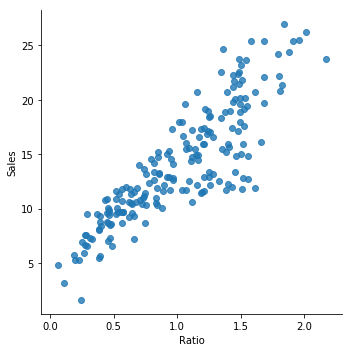

In [0]:
sns.lmplot("Ratio", "Sales", data=ads, fit_reg=False)

In [0]:
ads.head()

,TV,Radio,Newspaper,Sales,Ratio
1,230.1,37.8,69.2,22.1,1.6855
2,44.5,39.3,45.1,10.4,0.6445
3,17.2,45.9,69.3,9.3,0.6620
4,151.5,41.3,58.5,18.5,1.2565
5,180.8,10.8,58.4,12.9,1.2500


In [0]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']

X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [0]:
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.8972106381789522

- For a given amount of Radio and Newspaper spending, an increase of $1000 in **TV** spending is associated with an **increase in Sales of 45.8 widgets**.

- For a given amount of TV and Newspaper spending, an increase of $1000 in **Radio** spending is associated with an **increase in Sales of 188.5 widgets**.

- For a given amount of TV and Radio spending, an increase of $1000 in **Newspaper** spending is associated with an **decrease in Sales of 1.0 widgets**. How could that be?

In [0]:
linreg.intercept_ + (linreg.coef_[0] * 1000) + (linreg.coef_[1] * 0) + (linreg.coef_[2] * 0)

48.70353482485701

In [0]:
linreg.predict([[1000, 1000, 2000]])

array([235.15856566])

## PART 6: FEATURE SELECTION

### How do I decide **which features to include** in a linear model?

* We could try models with different sets of features, and **compare their R-squared values**

### However, this approach has **drawbacks**:
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared is less reliable.

### Does the best model includes **all three features**?
- R-squared will always increase as you add more features to the model, even if they are **unrelated** to the response.
- As such, using R-squared as a model evaluation metric can lead to **overfitting**.
- **Adjusted R-squared** is an alternative that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

### USING TRAIN/TEST SPLIT (OR CROSS-VALIDATION)
- A better approach to feature selection!
- They attempt to directly estimate how well your model will **generalize** to out-of-sample data.
- They rely on **fewer assumptions** that linear regression.
- They can easily be applied to **any model**, not just linear models.

### EVALUATION METRICS FOR REGRESSION PROBLEMS
- Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

#### Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [0]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
# $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [0]:
print (metrics.mean_absolute_error(y_true, y_pred))

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
# $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [0]:
print (metrics.mean_squared_error(y_true, y_pred))

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
# $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [0]:
print (np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

12.24744871391589


### COMPARING THESE METRICS:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

#### All of these are **loss functions**, because we want to minimize them.

## PART 7: USING TRAIN/TEST SPLIT FOR FEATURE SELECTION

* Let's use train/test split with RMSE to decide whether Newspaper should be kept in the model:

In [0]:
# define a function that accepts X and y and computes testing RMSE
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [0]:
# include Newspaper
feature_cols = ['TV', 'Radio', 'Newspaper']
X = ads[feature_cols]
train_test_rmse(X, y)

1.404651423032895

In [0]:
# exclude Newspaper
feature_cols = ['TV', 'Radio']
X = ads[feature_cols]
train_test_rmse(X, y)

1.3879034699382888

In [0]:
y = 
X = ads[['TV','Radio']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382888

## PART 8: COMPARING LINEAR REGRESSION WITH OTHER MODELS

#### Advantages of linear regression:
- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations

#### Disadvantages of linear regression:
- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

## REFERENCES

- [Standard Deviation](http://www.mathsisfun.com/data/standard-deviation.html)

- [Difference between correlation and covariance](http://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance)

- [What does the correlation matrix tell you? (The Correlation Matrix: Simple Tool, Powerful Insights & Clear Priorities)](http://www.allanalytics.com/author.asp?section_id=1413&doc_id=247352)